# Collate Results

In [2]:
import os
import re

# Directory containing the simulation output files
directory = '/Volumes/RahulT7Shield/Assign2_2_DONE/results_200M'  # Replace with the actual path to your files

# Ordered list of traces (as per your bash script)
traces = [
    "603.bwaves_s-3699B.champsimtrace.xz",
    "648.exchange2_s-1699B.champsimtrace.xz",
    "638.imagick_s-10316B.champsimtrace.xz",
    "644.nab_s-5853B.champsimtrace.xz",
    "627.cam4_s-573B.champsimtrace.xz",
    "600.perlbench_s-210B.champsimtrace.xz",
    "623.xalancbmk_s-700B.champsimtrace.xz",
    "654.roms_s-842B.champsimtrace.xz",
    "625.x264_s-18B.champsimtrace.xz",
    "607.cactuBSSN_s-2421B.champsimtrace.xz",
    "631.deepsjeng_s-928B.champsimtrace.xz",
    "628.pop2_s-17B.champsimtrace.xz",
    "649.fotonik3d_s-1176B.champsimtrace.xz",
]

# Replacement policies
repls = [
    "lru",
    "srrip",
    "srripfp",
    "drrip",
    "random",
]

# Data structure to hold extracted data grouped by replacement policy
data = {repl: [] for repl in repls}

# Iterate over replacement policies
for repl_policy in repls:
    # For each replacement policy, process traces in order
    for trace in traces:
        # Construct the expected filename
        # Assuming the filename pattern is:
        # "{trace}-bimodal-no-no-no-no-{repl}-1core-4MB--1-0.txt"
        trace_basename = os.path.basename(trace)
        filename = f"{trace_basename}-bimodal-no-no-no-no-{repl_policy}-1core-4MB--1-0.txt"
        filepath = os.path.join(directory, filename)
        if os.path.isfile(filepath):
            with open(filepath, 'r') as file:
                lines = file.readlines()
                # Find the last line containing performance metrics
                metrics_line = None
                for i in range(len(lines)-1, -1, -1):
                    line = lines[i].strip()
                    # Skip empty lines
                    if not line:
                        continue
                    # Match the line with performance metrics
                    if re.match(r'^\d+\.\d+,', line):
                        metrics_line = line
                        break
                if not metrics_line:
                    print(f'Metrics line not found in file: {filename}')
                    data[repl_policy].append('')  # Append an empty string or placeholder
                else:
                    data[repl_policy].append(metrics_line)
        else:
            print(f'File not found: {filename}')
            data[repl_policy].append('')  # Append an empty string or placeholder

# Write the data to a CSV file
output_file = 'task2_2.csv'
with open(output_file, 'w') as f:
    for repl_policy in repls:
        # Write the replacement policy line
        f.write(f'{repl_policy},\n')
        # Write the data lines for this replacement policy
        for metrics_line in data[repl_policy]:
            f.write(f'{metrics_line}\n')
        # Optionally, add an empty line between replacement policies
        # f.write('\n')

print(f'Data has been written to {output_file}')


Data has been written to task2_2.csv


# Plots

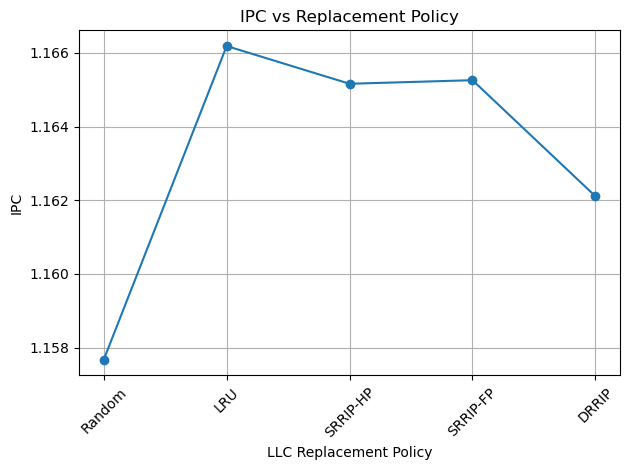

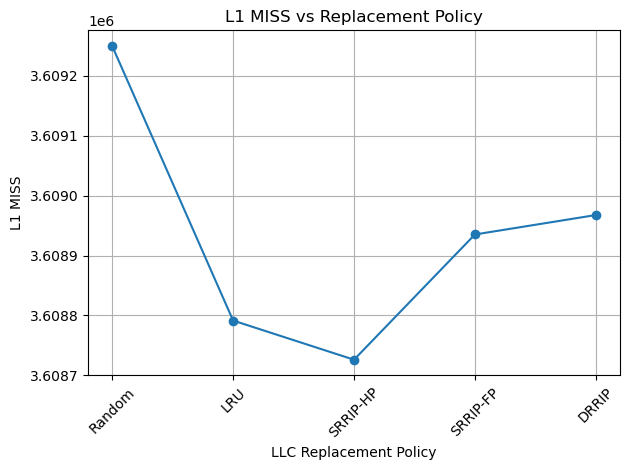

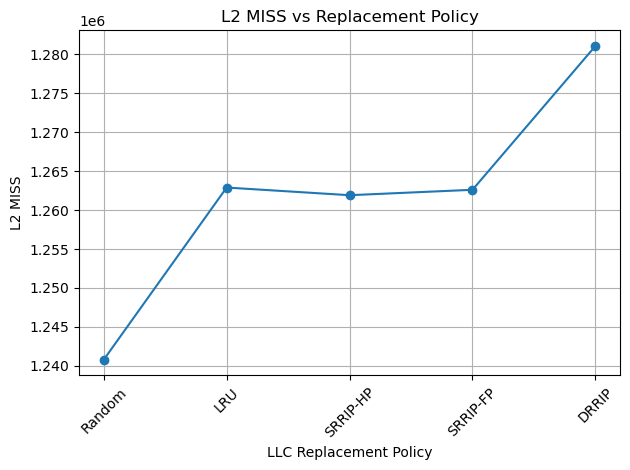

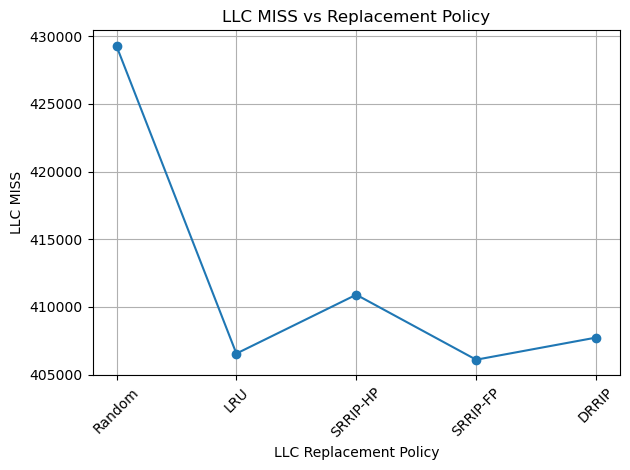

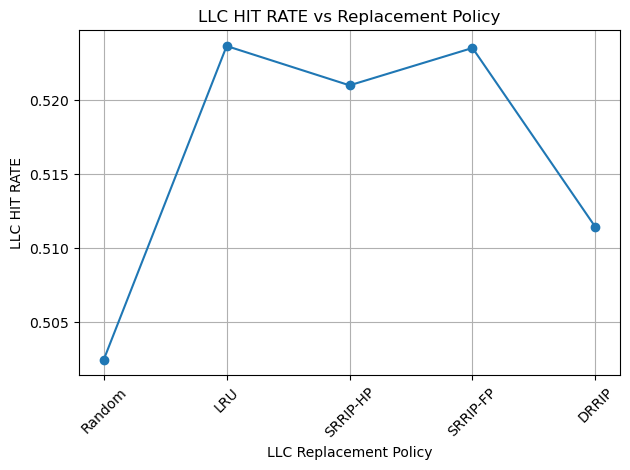

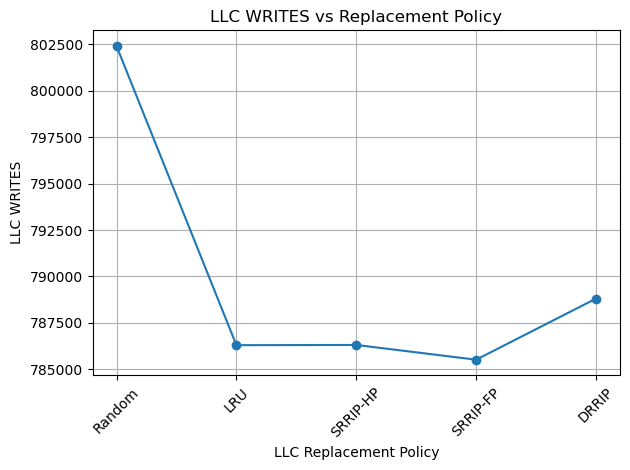

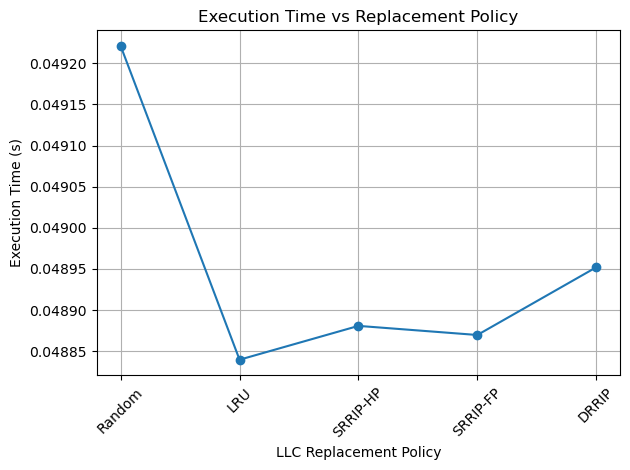

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the second table
replacement_policy = ['Random', 'LRU', 'SRRIP-HP', 'SRRIP-FP', 'DRRIP']
ipc = [1.157672077, 1.166189538, 1.165164462, 1.165261692, 1.162110385]
l1_miss = [3609250, 3608791.462, 3608726.077, 3608935.231, 3608967.692]
l2_miss = [1240785.308, 1262897.308, 1261913.846, 1262608.385, 1281074.923]
llc_miss = [429274.3846, 406550.5385, 410899.7692, 406097.3077, 407731.3077]
llc_hit_rate = [0.5024728462, 0.5236671538, 0.5210099231, 0.5235352308, 0.5114336154]
llc_writes = [802416.3846, 786297.1538, 786308.6154, 785514, 788806.6154]
execution_time = [0.049221, 0.04883973846, 0.04888084462, 0.04886977692, 0.04895204615]

# Function to create bar plots for each variable
def plot_variable(x, y, y_label, title):
    plt.figure()
    plt.plot(x, y, marker='o')
    plt.xlabel('LLC Replacement Policy')
    plt.ylabel(y_label)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot IPC vs Replacement Policy
plot_variable(replacement_policy, ipc, 'IPC', 'IPC vs Replacement Policy')

# Plot L1 MISS vs Replacement Policy
plot_variable(replacement_policy, l1_miss, 'L1 MISS', 'L1 MISS vs Replacement Policy')

# Plot L2 MISS vs Replacement Policy
plot_variable(replacement_policy, l2_miss, 'L2 MISS', 'L2 MISS vs Replacement Policy')

# Plot LLC MISS vs Replacement Policy
plot_variable(replacement_policy, llc_miss, 'LLC MISS', 'LLC MISS vs Replacement Policy')

# Plot LLC HIT RATE vs Replacement Policy
plot_variable(replacement_policy, llc_hit_rate, 'LLC HIT RATE', 'LLC HIT RATE vs Replacement Policy')

# Plot LLC WRITES vs Replacement Policy
plot_variable(replacement_policy, llc_writes, 'LLC WRITES', 'LLC WRITES vs Replacement Policy')

# Plot Execution Time vs Replacement Policy
plot_variable(replacement_policy, execution_time, 'Execution Time (s)', 'Execution Time vs Replacement Policy')


/var/folders/wz/s8vcs1pn4pxbr5r_s42r6tn00000gn/T/ipykernel_4911/1967811216.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(replacement_policy, rotation=45)
/var/folders/wz/s8vcs1pn4pxbr5r_s42r6tn00000gn/T/ipykernel_4911/1967811216.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(replacement_policy, rotation=45)
/var/folders/wz/s8vcs1pn4pxbr5r_s42r6tn00000gn/T/ipykernel_4911/1967811216.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(replacement_policy, rotation=45)
/var/folders/wz/s8vcs1pn4pxbr5r_s42r6tn00000gn/T/ipykernel_4911/1967811216.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a 

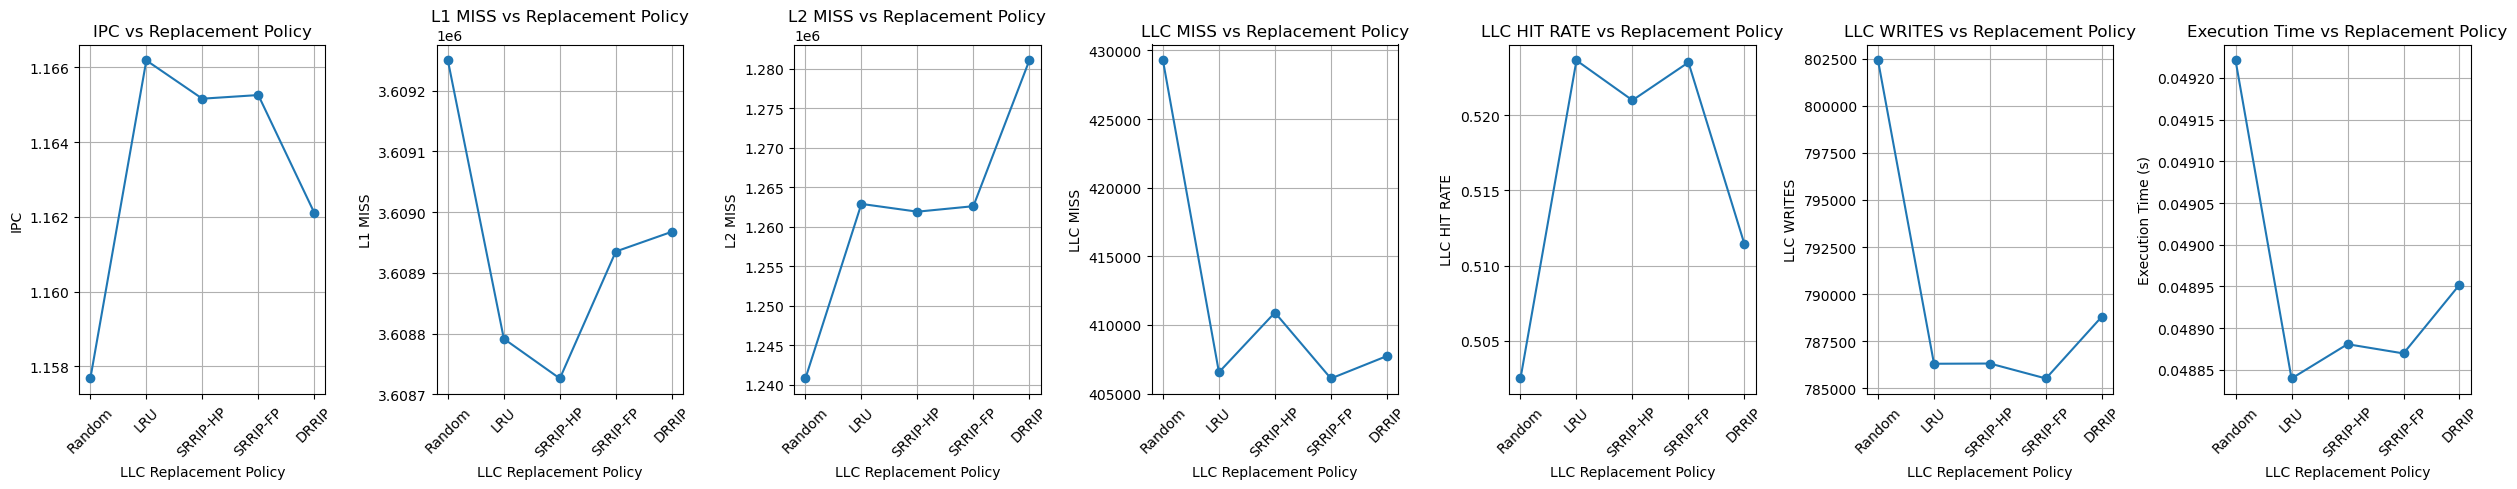

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the second table
replacement_policy = ['Random', 'LRU', 'SRRIP-HP', 'SRRIP-FP', 'DRRIP']
ipc = [1.157672077, 1.166189538, 1.165164462, 1.165261692, 1.162110385]
l1_miss = [3609250, 3608791.462, 3608726.077, 3608935.231, 3608967.692]
l2_miss = [1240785.308, 1262897.308, 1261913.846, 1262608.385, 1281074.923]
llc_miss = [429274.3846, 406550.5385, 410899.7692, 406097.3077, 407731.3077]
llc_hit_rate = [0.5024728462, 0.5236671538, 0.5210099231, 0.5235352308, 0.5114336154]
llc_writes = [802416.3846, 786297.1538, 786308.6154, 785514, 788806.6154]
execution_time = [0.049221, 0.04883973846, 0.04888084462, 0.04886977692, 0.04895204615]

# Prepare subplots - 1 row, 7 columns
fig, axs = plt.subplots(1, 7, figsize=(25, 5))

# List of data and labels to plot
data = [
    (ipc, 'IPC', 'IPC vs Replacement Policy'),
    (l1_miss, 'L1 MISS', 'L1 MISS vs Replacement Policy'),
    (l2_miss, 'L2 MISS', 'L2 MISS vs Replacement Policy'),
    (llc_miss, 'LLC MISS', 'LLC MISS vs Replacement Policy'),
    (llc_hit_rate, 'LLC HIT RATE', 'LLC HIT RATE vs Replacement Policy'),
    (llc_writes, 'LLC WRITES', 'LLC WRITES vs Replacement Policy'),
    (execution_time, 'Execution Time (s)', 'Execution Time vs Replacement Policy')
]

# Plot each variable in the respective subplot
for i, (y, ylabel, title) in enumerate(data):
    axs[i].plot(replacement_policy, y, marker='o')
    axs[i].set_xlabel('LLC Replacement Policy')
    axs[i].set_ylabel(ylabel)
    axs[i].set_title(title)
    axs[i].set_xticklabels(replacement_policy, rotation=45)
    axs[i].grid(True)

# Adjust layout to fit all plots
plt.tight_layout()
plt.show()